In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate




In [107]:
# Read the data
data = pd.read_csv('1_new_waveform.csv')  # Replace with your filename

In [108]:

data['AccelerometerX'] = data['AccelerometerX']
data['AccelerometerY'] = data['AccelerometerY']
data['AccelerometerZ'] = data['AccelerometerZ']


In [109]:
az = (data['AccelerometerZ'][0])
ay= (data['AccelerometerY'][0])
ax = (data['AccelerometerX'][0])
print(ax,ay,az)

5.527503335644736e-16 5.033508591858098e-16 7.93359585257984e-16


In [110]:
# Calculate the variance
var_x = data['AccelerometerX'].var()
var_y = data['AccelerometerY'].var()
var_z = data['AccelerometerZ'].var()

print("Variance for AccelerometerX: ", var_x)
print("Variance for AccelerometerY: ", var_y)
print("Variance for AccelerometerZ: ", var_z)

Variance for AccelerometerX:  1.324188017344277
Variance for AccelerometerY:  1.0080035329844006
Variance for AccelerometerZ:  4.01164833301193


In [111]:


plt.show()

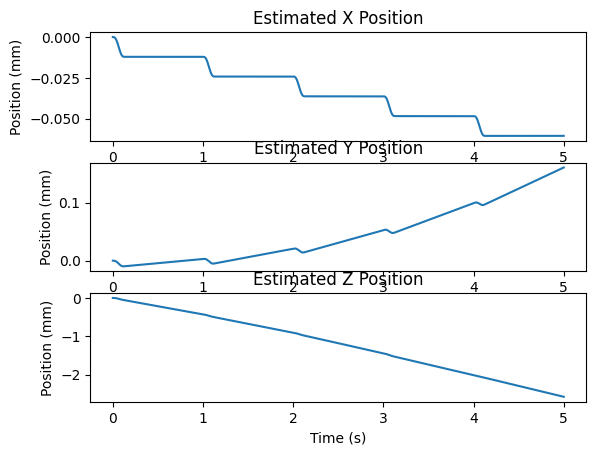

Text(0.5, 0.92, '3D Plot of Estimated Position')

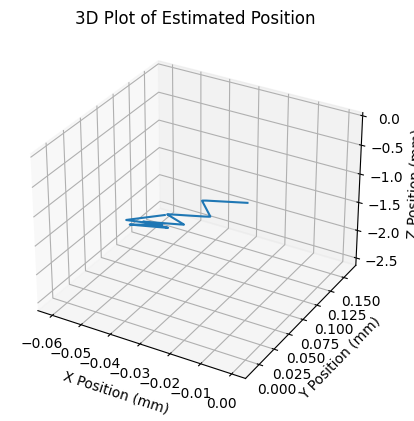

In [128]:
delta_t = np.mean(np.diff(data.Time))  # time step

# Compute velocity and position for each direction
velocity_X = integrate.cumtrapz(data.AccelerometerX, dx=delta_t, initial=0)
position_X = integrate.cumtrapz(velocity_X, dx=delta_t, initial=0)

velocity_Y = integrate.cumtrapz(data.AccelerometerY, dx=delta_t, initial=0)
position_Y = integrate.cumtrapz(velocity_Y, dx=delta_t, initial=0)

velocity_Z = integrate.cumtrapz(data.AccelerometerZ, dx=delta_t, initial=0)
position_Z = integrate.cumtrapz(velocity_Z, dx=delta_t, initial=0)

# Plotting position data
plt.figure()

plt.subplot(3,1,1)
plt.plot(data.Time, position_X)
plt.title('Estimated X Position')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

plt.subplot(3,1,2)
plt.plot(data.Time, position_Y)
plt.title('Estimated Y Position')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

plt.subplot(3,1,3)
plt.plot(data.Time, position_Z)
plt.title('Estimated Z Position')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

plt.show()

# 3D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(position_X, position_Y, position_Z)
ax.set_xlabel('X Position (mm)')
ax.set_ylabel('Y Position (mm)')
ax.set_zlabel('Z Position (mm)')
ax.set_title('3D Plot of Estimated Position')

In [134]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your x_new, y_new, and z_new are numpy arrays
assert isinstance(x_new, np.ndarray)
assert isinstance(y_new, np.ndarray)
assert isinstance(z_new, np.ndarray)

# Create an array of indices from 1 to length
indices = np.arange(1, length+1, dtype=int)

# Select 2000 evenly spaced samples from the array
selected_indices = np.linspace(1, length-1, num=200, dtype=int)

# Select the corresponding elements from your coordinate arrays
x_subsample = position_X[selected_indices]
y_subsample = position_Y[selected_indices]
z_subsample = position_Z[selected_indices]
print(x_subsample.shape, y_subsample.shape, z_subsample.shape)

(200,) (200,) (200,)


MovieWriter imagemagick unavailable; using Pillow instead.


(200,)


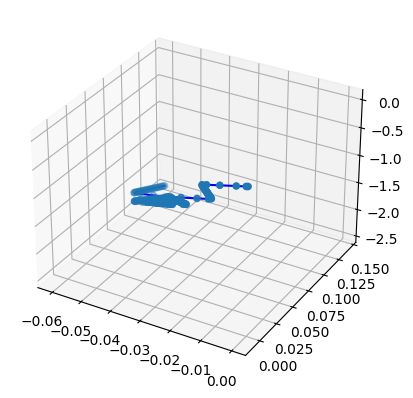

In [135]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x_subsample = position_X[::10]
print(x_subsample.shape)
def animate(i):
    ax.clear()
    ax.scatter(x_subsample[:i+1], y_subsample[:i+1], z_subsample[:i+1])
    ax.plot(x_subsample[:i+1], y_subsample[:i+1], z_subsample[:i+1], color='blue')
     # Set the viewing angle

    # Manually set the axes limits
    #ax.set_xlim([-0.012,-0.005])
    #ax.set_ylim([-0.012,-0.005 ])
    #ax.set_zlim([0.122, 0.15])

ani = animation.FuncAnimation(fig, animate, frames=len(x_subsample), interval=199, blit=False)
ani.save('1_updated_wave.gif', writer='imagemagick', fps=10)

plt.show()

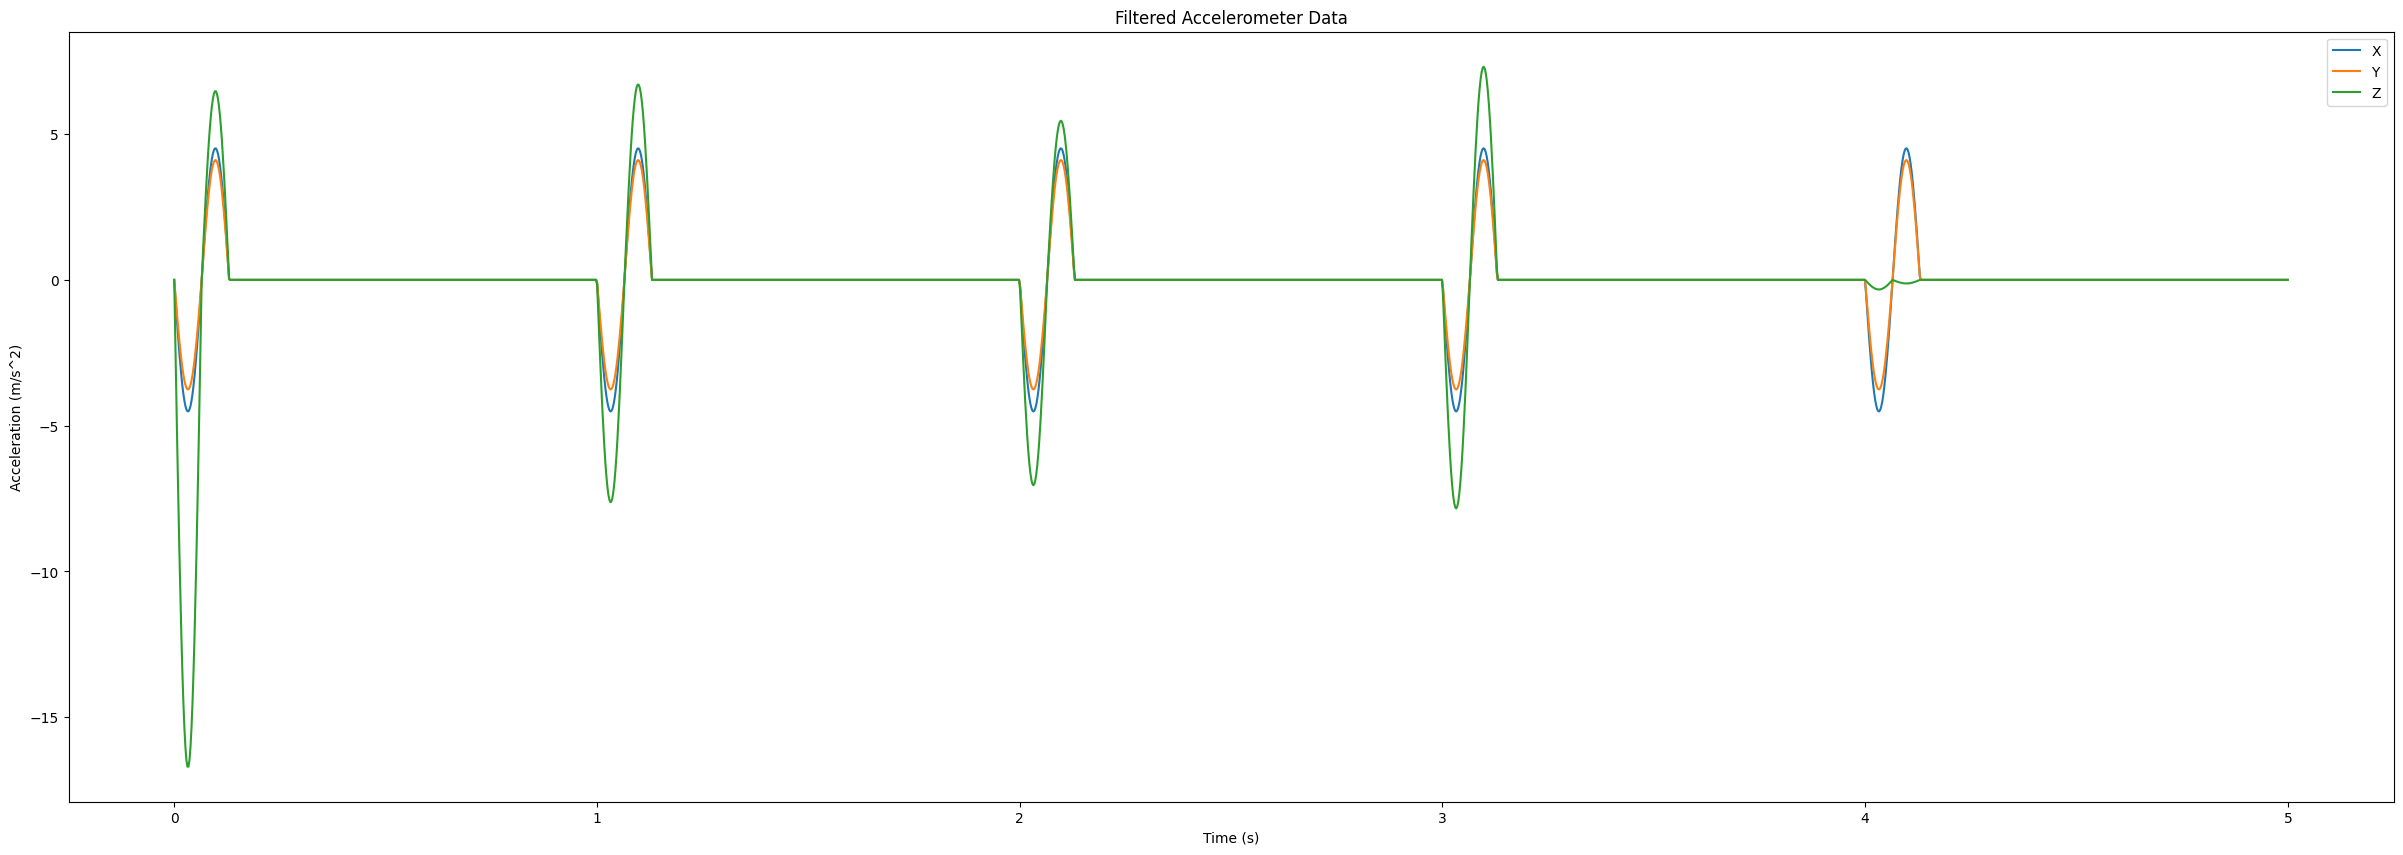

In [113]:
# Plotting filtered accelerometer data
plt.figure(figsize=(30, 22))

plt.subplot(2,1,1)
plt.plot(data.Time, data.AccelerometerX, label='X')
plt.plot(data.Time, data.AccelerometerY, label='Y')
plt.plot(data.Time, data.AccelerometerZ, label='Z')
plt.title('Filtered Accelerometer Data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()

plt.show()

In [114]:
# so Ihave 7 time steps I need to calcualte them all
#let me try to do it for one time step first and make methods to stramline the process.


In [115]:
#applying kalma filter in 3d
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import numpy as np

def setup_kalman_filter():
    # create the Kalman filter
    kf = KalmanFilter(dim_x=9, dim_z=3)  

    # state transition matrix
    dt = 1.0/208  # time step
    dt2 = (dt**2) / 2


    kf.F = np.array([[1, dt, dt2, 0, 0, 0, 0, 0, 0],
                     [0, 1, dt, 0, 0, 0, 0, 0, 0],
                     [0, 0, 1, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 1, dt, dt2, 0, 0, 0],
                     [0, 0, 0, 0, 1, dt, 0, 0, 0],
                     [0, 0, 0, 0, 0, 1, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, dt, dt2],
                     [0, 0, 0, 0, 0, 0, 0, 1, dt],
                     [0, 0, 0, 0, 0, 0, 0, 0, 1]])

    # measurement function
    kf.H = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 1, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 1]])

    # covariance matrix
    #R matrix is the measurement noise covariance matrix, that measures the uncertainty in the measurement.
    # that means it is `variance of the measurement noise in the ACCEELEROMTER DATA`
    kf.R = np.array([[var_x, 0, 0],
                 [0, var_y, 0],
                 [0, 0, var_z]])
  # change to 3x3 identity matrix
  #kf.R = np.array ( [ [1, 0, 0],[0, 1 , 0], [0, 0, 1] ] )
    # process noise
    #Q matrix is the process noise covariance matrix, that measures the uncertainty in the process/PREDICTION
    q = Q_discrete_white_noise(dim=3, dt=dt, var=0.13)
    kf.Q = np.block([
        [q, np.zeros((3,6))],
        [np.zeros((6,3)), np.zeros((6,6))]
    ])  # change to 9x9 identity matrix

    return kf


'''Matrix 𝑄𝑘 represents the process noise covariance matrix, which describes the 
statistics of the noise related to sensor, and 𝑅𝑘 represents the measurement noise 
covariance matrix. They are assumed to be independent, with normal probability 
distribution,
𝑝(𝑤) ~ 𝑁(0,𝑄)
𝑝(𝑣) ~ 𝑁(0, 𝑅'''
# usage
kf = setup_kalman_filter()

# assuming you have data in pandas DataFrame `data`
measurements = data[['AccelerometerX', 'AccelerometerY', 'AccelerometerZ']].values  # acceleration measurements

initial_state = [0 ,0, ax, 0, 0, ay, 0, 0, az]  # initial distance, velocity, and acceleration in x, y, z



#initial_state = [0 ,0, 0, 0, 0, 0, 0, 0, 0]
# Create arrays to hold the states and measurements
states = []
measured = []

kf.x = np.array(initial_state)

# Create an array to hold the error covariance matrices
covariances = []

for measurement in measurements:
    kf.predict()
    covariances.append(kf.P)  # Append covariance matrix after prediction
    kf.update(measurement)
    covariances.append(kf.P)  # Append covariance matrix after update
    
    # save the state and measurement
    states.append(kf.x)
    measured.append(measurement)

covariances = np.array(covariances)


states = np.array(states)

TypeError: unsupported operand type(s) for *: 'float' and 'Axes3D'

In [116]:
'''from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise
import numpy as np

def f(x, dt):
    """
    State transition function. Computes the next state given the current state and the time step.
    """
    # Unpack the state vector
    x, vx, ax, y, vy, ay, z, vz, az = x
    omega_x=1
    omega_y=1
    omega_z=1
    # Update position, velocity, and acceleration
    x_new = -np.sin(omega_x*dt)
    vx_new = -omega_x * np.cos(omega_x*dt)
    ax_new = omega_x**2 * np.sin(omega_x*dt)

    y_new = -np.sin(omega_y*dt)
    vy_new = -omega_y * np.cos(omega_y*dt)
    ay_new = omega_y**2 * np.sin(omega_y*dt)

    z_new = -np.sin(omega_z*dt)
    vz_new = -omega_z * np.cos(omega_z*dt)
    az_new = omega_z**2 * np.sin(omega_z*dt)

    return [x_new, vx_new, ax_new, y_new, vy_new, ay_new, z_new, vz_new, az_new]



def h(x):
    """
    Measurement function. Projects the state into the measurement space.
    In this case, we assume we're only measuring acceleration, so we return just the acceleration.
    """
    _, _, ax, _, _, ay, _, _, az = x
    return [ax, ay, az]


dim_x = 9
dim_z = 3
dt = 1.0/416  # time step

# create sigma points to use in the filter. This is part of the Unscented Transform
points = MerweScaledSigmaPoints(dim_x, alpha=.1, beta=2., kappa=1.)

kf = UnscentedKalmanFilter(dim_x=dim_x, dim_z=dim_z, dt=dt, fx=f, hx=h, points=points)

# process noise
sigma = 0.13
q = np.diag([sigma**2]*dim_x)
kf.Q = q


# assuming you have data in pandas DataFrame `data`
measurements = data[['AccelerometerX', 'AccelerometerY', 'AccelerometerZ']].values  # acceleration measurements

initial_state = [0, 0, ax, 0, 0, ay, 0, 0, az]  # initial position, velocity, and acceleration in x, y, z
kf.x = np.array(initial_state)

states = []

for measurement in measurements:
    kf.predict()
    kf.update(measurement)
    states.append(kf.x)

    
    # save the state and measurement
    states.append(kf.x)
    measured.append(measurement)

covariances = np.array(covariances)
states = np.array(states)'''



'from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints\nfrom filterpy.common import Q_discrete_white_noise\nimport numpy as np\n\ndef f(x, dt):\n    """\n    State transition function. Computes the next state given the current state and the time step.\n    """\n    # Unpack the state vector\n    x, vx, ax, y, vy, ay, z, vz, az = x\n    omega_x=1\n    omega_y=1\n    omega_z=1\n    # Update position, velocity, and acceleration\n    x_new = -np.sin(omega_x*dt)\n    vx_new = -omega_x * np.cos(omega_x*dt)\n    ax_new = omega_x**2 * np.sin(omega_x*dt)\n\n    y_new = -np.sin(omega_y*dt)\n    vy_new = -omega_y * np.cos(omega_y*dt)\n    ay_new = omega_y**2 * np.sin(omega_y*dt)\n\n    z_new = -np.sin(omega_z*dt)\n    vz_new = -omega_z * np.cos(omega_z*dt)\n    az_new = omega_z**2 * np.sin(omega_z*dt)\n\n    return [x_new, vx_new, ax_new, y_new, vy_new, ay_new, z_new, vz_new, az_new]\n\n\n\ndef h(x):\n    """\n    Measurement function. Projects the state into the measurement s

In [117]:
print(states.shape)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
print(states[0])

[1.59702736e-21 1.32872676e-18 5.52750334e-16 1.45430051e-21
 1.20997803e-18 5.03350859e-16 2.29220479e-21 1.90711439e-18
 7.93359585e-16]


In [ ]:
import matplotlib.pyplot as plt

# Extract position, velocity, and acceleration from states
position_x = states[:, 0]
velocity_x = states[:, 1]
acceleration_x = states[:, 2]

position_y = states[:, 3]
velocity_y = states[:, 4]
acceleration_y = states[:, 5]

position_z = states[:, 6]
velocity_z = states[:, 7]
acceleration_z = states[:, 8]


In [ ]:
print(acceleration_x.shape)


(2080,)


In [ ]:
import numpy as np

# Your original time array
time = data['Time'].values
N = len(time)

# Your position data
position_x = states[:, 0]
M = len(position_x)

# Calculate dt and new end time
dt = (time[-1] - time[0]) / (N - 1)
t_end_new = time[0] + dt * (M - 1)

# Generate new time array
time_new = np.linspace(time[0], t_end_new, M)



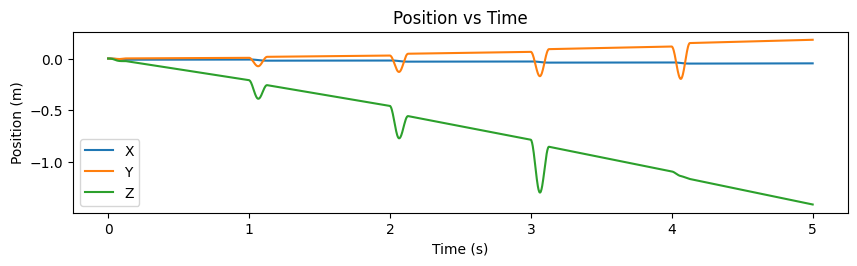

In [ ]:
# Plot position vs time
plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
plt.plot(time_new, position_x, label='X')
plt.plot(time_new, position_y, label='Y')
plt.plot(time_new, position_z, label='Z')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()


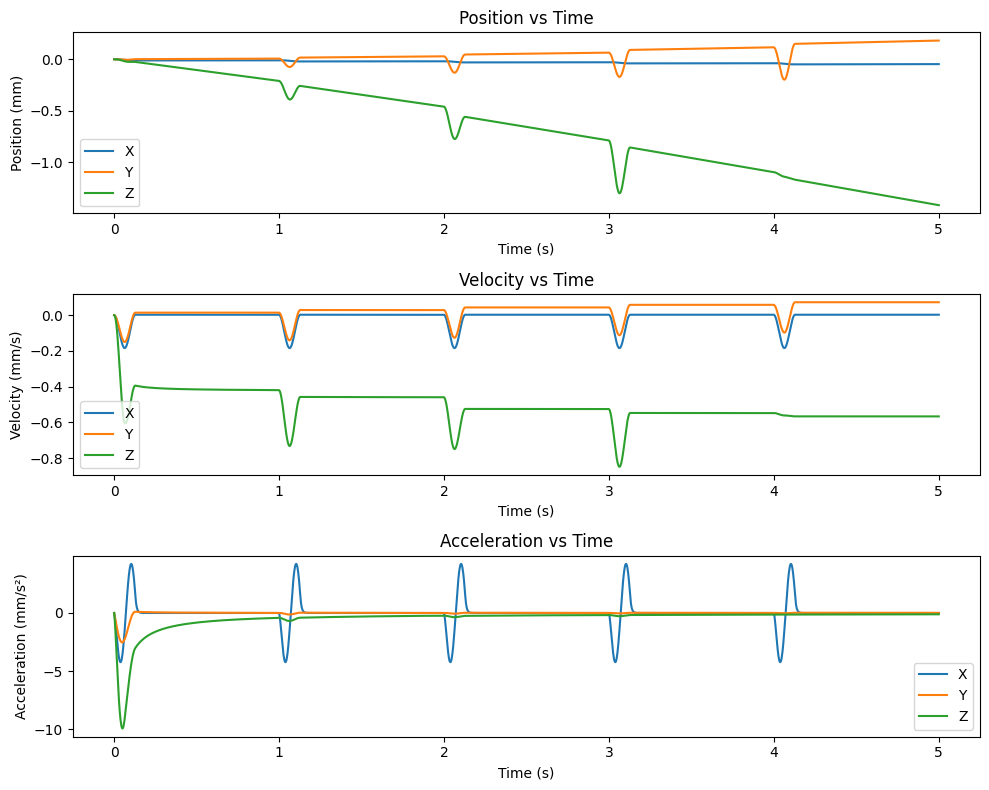

In [ ]:
import matplotlib.pyplot as plt

# Extract position, velocity, and acceleration from states


#time = data['Time'].values
time= time_new
# Plot position vs time
plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
plt.plot(time, position_x, label='X')
plt.plot(time, position_y, label='Y')
plt.plot(time, position_z, label='Z')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')
plt.legend()

# Plot velocity vs time
plt.subplot(3, 1, 2)
plt.plot(time, velocity_x, label='X')
plt.plot(time, velocity_y, label='Y')
plt.plot(time, velocity_z, label='Z')
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (mm/s)')
plt.legend()

# Plot acceleration vs time
plt.subplot(3, 1, 3)
plt.plot(time, acceleration_x, label='X')
plt.plot(time, acceleration_y, label='Y')
plt.plot(time, acceleration_z, label='Z')
plt.title('Acceleration vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (mm/s²)')
plt.legend()

plt.tight_layout()
plt.show()

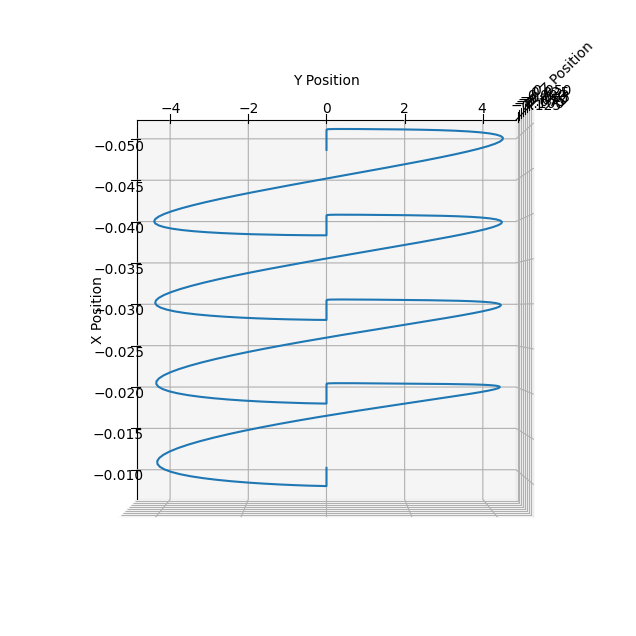

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))  # Increase the figure size

ax = fig.add_subplot(111, projection='3d')

# Assuming states is a numpy array where the first three indices are the x, y, z positions.
x = states[:, 0]
y = states[:, 2]
z = states[:, 4]
z_new = z[101:]
x_new = x[101:]
y_new = y[101:]
ax.plot(x_new, y_new, z_new)

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

# Set the desired viewing angle
ax.view_init(elev=90, azim=0)  # Adjust the elevation (elev) and azimuth (azim) angles as needed

plt.show()


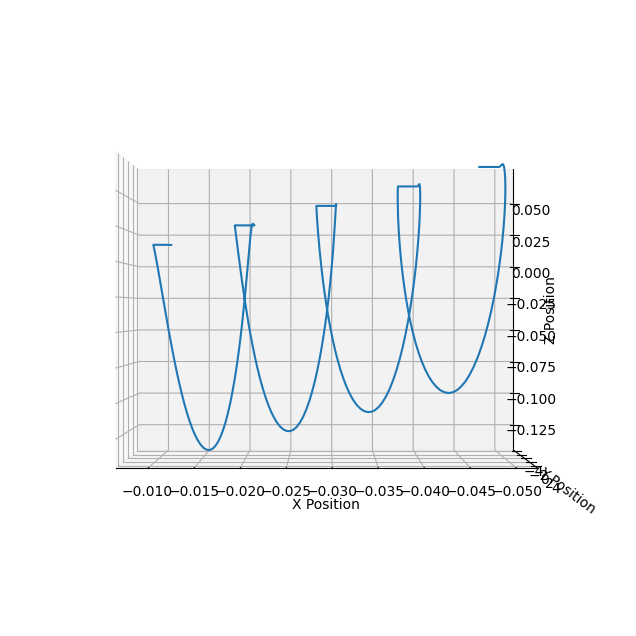

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))  # Increase the figure size

ax = fig.add_subplot(111, projection='3d')

# Assuming states is a numpy array where the first three indices are the x, y, z positions.
x = states[:, 0]
y = states[:, 2]
z = states[:, 4]
z_new = z[101:]
x_new = x[101:]
y_new = y[101:]
ax.plot(x_new, y_new, z_new)

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

# Set the desired viewing angle
ax.view_init(elev=0, azim=90)  # Adjust the elevation (elev) and azimuth (azim) angles as needed

plt.show()


In [ ]:
length= len(x_new)
#tell us the number of datapoints that we have

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your x_new, y_new, and z_new are numpy arrays
assert isinstance(x_new, np.ndarray)
assert isinstance(y_new, np.ndarray)
assert isinstance(z_new, np.ndarray)

# Create an array of indices from 1 to length
indices = np.arange(1, length+1, dtype=int)

# Select 2000 evenly spaced samples from the array
selected_indices = np.linspace(1, length-1, num=200, dtype=int)

# Select the corresponding elements from your coordinate arrays
x_subsample = x_new[selected_indices]
y_subsample = y_new[selected_indices]
z_subsample = z_new[selected_indices]

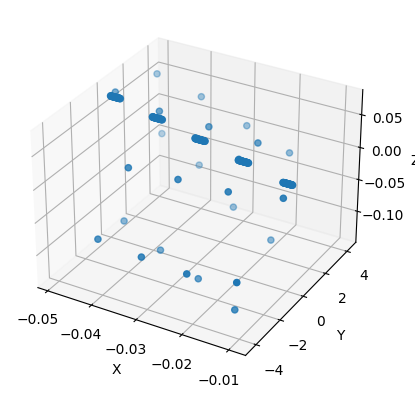

In [ ]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the subsampled points
ax.scatter(x_subsample, y_subsample, z_subsample)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'set_zlim'

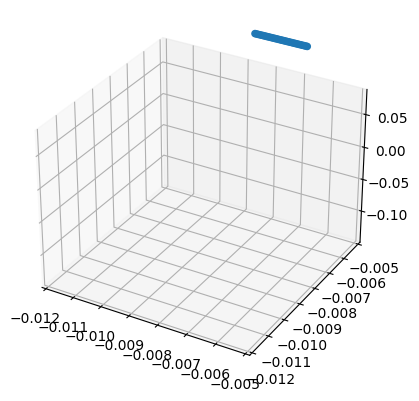

In [ ]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the subsampled points
ax.scatter(x_subsample, y_subsample, z_subsample)
ax.set_xlim([-0.012,-0.005])
ax.set_ylim([-0.012,-0.005 ])

x.set_zlim([0.122, 0.15])
# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(0, 90)
# Show the plot
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


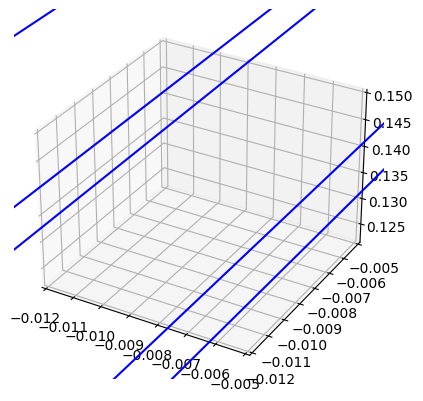

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Set up the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def animate(i):
    ax.clear()
    ax.scatter(x_subsample[:i+1], y_subsample[:i+1], z_subsample[:i+1])
    ax.plot(x_subsample[:i+1], y_subsample[:i+1], z_subsample[:i+1], color='blue')
     # Set the viewing angle

    # Manually set the axes limits
    ax.set_xlim([-0.012,-0.005])
    ax.set_ylim([-0.012,-0.005 ])
    ax.set_zlim([0.122, 0.15])

ani = animation.FuncAnimation(fig, animate, frames=len(x_subsample), interval=200, blit=False)
ani.save('1_updated wave.gif', writer='imagemagick', fps=10)

plt.show()


In [ ]:
    pxt = states[:, 0]
    pyt = states[:, 3]
    pzt = states[:, 6]

    vxt = states[:, 1]
    vyt = states[:, 4]
    vzt = states[:, 7]
    
    axt = states[:, 2]
    ayt = states[:, 5]
    azt = states[:, 8]

    position_x = pxt[-1]
    position_y = pyt[-1]
    position_z = pzt[-1]
    velocity_x = vxt[-1]
    velocity_y = vyt[-1]
    velocity_z = vzt[-1]
    acceleration_x = axt[-100]
    acceleration_y = ayt[-100]
    acceleration_z = azt[-100]

In [ ]:
print(position_x,position_y,position_z)
print(velocity_x,velocity_y,velocity_z)
print(acceleration_x,acceleration_y,acceleration_z)

-0.04704749806461527 0.18163016824650868 -1.4161228436589792
0.0027184460665987966 0.07265206729860342 -0.5664491374635894
3.127872170492531e-36 0.015256198083167317 -0.11894001747079458
